# Lightfield Camera

## Matthew Hallac & Saurav Shroff

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
from skimage.color import rgb2gray

### Part 1: Depth Refocusing

In [3]:
path = './inputs/chessboard/'

images = []
filenames = []
for file in os.listdir(path):
    im = imread(path + file)
    imR = np.expand_dims(np.pad(im[:,:,0], 150, mode='constant'), 2)
    imG = np.expand_dims(np.pad(im[:,:,1], 150, mode='constant'), 2)
    imB = np.expand_dims(np.pad(im[:,:,2], 150, mode='constant'), 2)
    images.append(np.concatenate((imR, imG, imB), axis=2))
    filenames.append(file)
images = np.array(images)

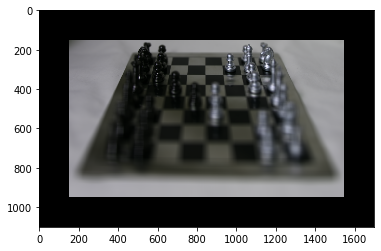

In [4]:
imshow(np.mean(images, axis=0))

In [18]:
im = imread(path + 'out_08_08_-818.578247_-3313.998047_.png')
imR = np.expand_dims(np.pad(im[:,:,0], 150, mode='constant'), 2)
imG = np.expand_dims(np.pad(im[:,:,1], 150, mode='constant'), 2)
imB = np.expand_dims(np.pad(im[:,:,2], 150, mode='constant'), 2)
imsave("small.png", np.concatenate((imR, imG, imB), axis=2))

In [19]:
alpha = 0.2
transformed_ims = []
for i in range(len(filenames)):
#     print(i)
    y_diff = float(filenames[i].split('_')[3]) + 818.578247
    x_diff = float(filenames[i].split('_')[4]) + 3313.998047
    transformed_ims.append(np.roll(images[i], (int(alpha * x_diff), int(alpha * y_diff)), axis=(1,0)))
    

In [22]:
imsave("large.png",np.mean(np.array(transformed_ims), axis=0))

### Part 2: Aperature Adjustment

In [29]:
aperature_val = 1 #lower value means less images will be used
aperature_ims = []

for i in range(len(filenames)):
#     print(i)
    x = abs(int(filenames[i].split('_')[1]) - 8)
    y = abs(int(filenames[i].split('_')[2]) - 8)
    if x <= aperature_val and y <= aperature_val:
        aperature_ims.append(transformed_ims[i])

In [30]:
imsave("small.png",np.mean(np.array(aperature_ims), axis=0))

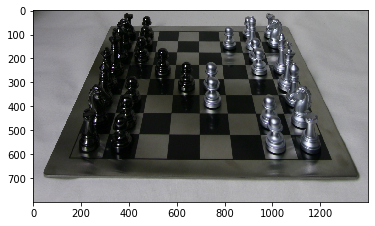

In [16]:
imshow(imread(path + 'out_08_08_-818.578247_-3313.998047_.png'))